# 선형 회귀 연습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression, Ridge

#### Genrating Regression Dataset
* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

In [5]:
from sklearn.datasets import make_regression

X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

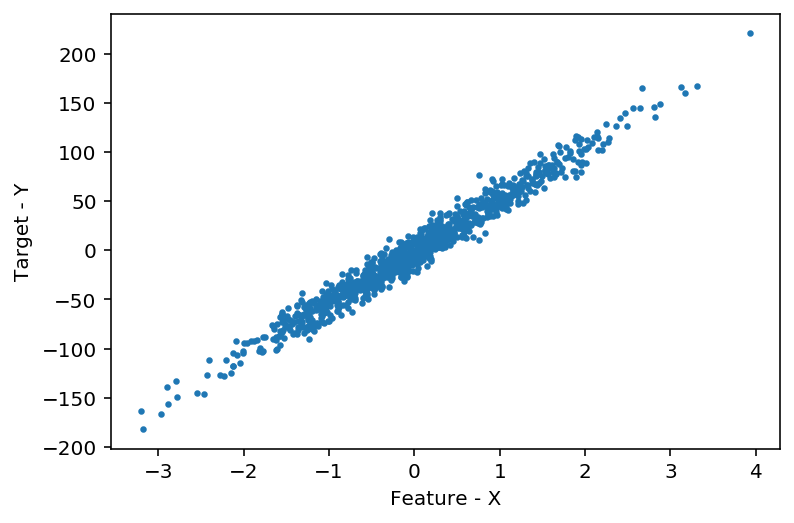

In [7]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

In [8]:
lr = LinearRegression()
lr.fit(X,Y)
lr.coef_, lr.intercept_

(array([52.54713342]), -0.5382718572059741)

### Predicting using trained model

In [9]:
pred = lr.predict(X)

In [10]:
pred

array([ 6.30277956e+01,  4.57768583e+01,  1.38269158e+02,  6.40004746e+01,
        5.38904828e+01, -2.42125553e+01,  6.30391212e+00,  1.60277218e+01,
       -5.64294851e+01, -3.06241939e+01, -1.96643595e+01,  2.06893846e+01,
       -1.40638468e+01, -5.08998525e+01, -6.85985829e+01, -1.98875930e+01,
       -6.75343721e+01,  4.76934660e+01,  8.49153080e+00,  1.63718452e+02,
        3.63296879e+01, -6.25728199e+01, -2.69760705e+01, -2.44295164e+01,
       -1.36091116e+01,  1.53119592e+01,  3.68667101e+01,  6.01716373e+01,
       -1.40486853e+01, -2.81935035e+01,  8.15305008e+01,  1.71907552e+01,
        1.38357716e+01,  1.23873176e+02,  6.86663197e+01, -1.17669631e+02,
       -1.68828745e+01,  1.52600347e+00, -2.76489681e+01,  3.70387110e+01,
       -6.33411193e+00,  7.78033908e+01,  1.65363375e+01, -8.87483855e+00,
        2.83441097e+01,  7.18312361e+01,  1.05273167e+02, -7.26074057e+01,
        1.19846510e+01, -8.22912925e+01,  1.06447565e+01, -3.90819607e+01,
       -3.47723494e+01,  

* Blue dots represent maps to actual target data
* Orange dots represent predicted data 

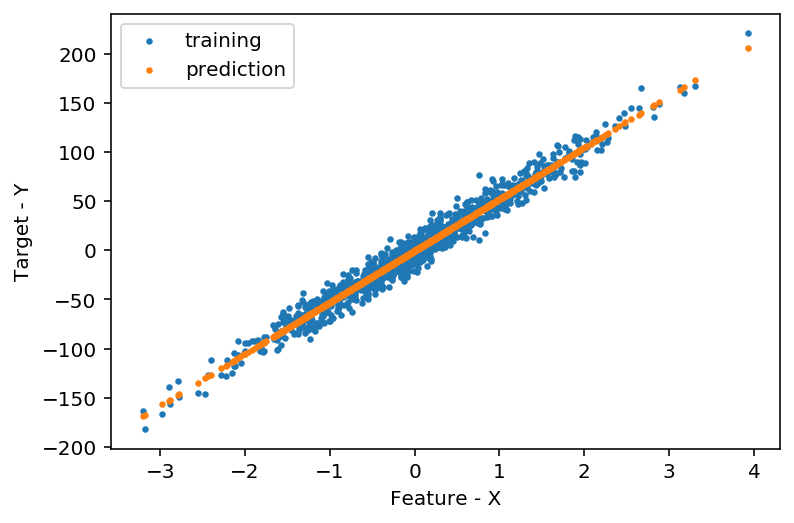

In [11]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

## 3. Regularized Regression Methods 
![](img/3.RegressionTechniques-01.jpg)

### Ridge Regression
* Ridge Regression imposes penalty on size of coef.
* Less impacted by outliers.

#### Adding outliers to data

### Ridge
- w = Error 항 + alpha*(weight**2)
- alpha 값이 커질수록 weight 값의 크기를 더욱 작게 제한하게 된다.

In [12]:
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
ridge.coef_

array([0.44186047, 0.44186047])

In [14]:
ridge.intercept_

0.07209302325581401

In [15]:
lr.coef_

array([0.475, 0.475])

In [16]:
lr.intercept_

0.050000000000000044

- ridge에 의한 가중치 값이 더 작아진 것을 볼 수 있다.

### 일부 데이터 변형
- Y[950: -1] - 600

In [11]:
outliers = Y[950:] - 600

In [12]:
import numpy as np

Y_Out = np.append(Y[:950],outliers)

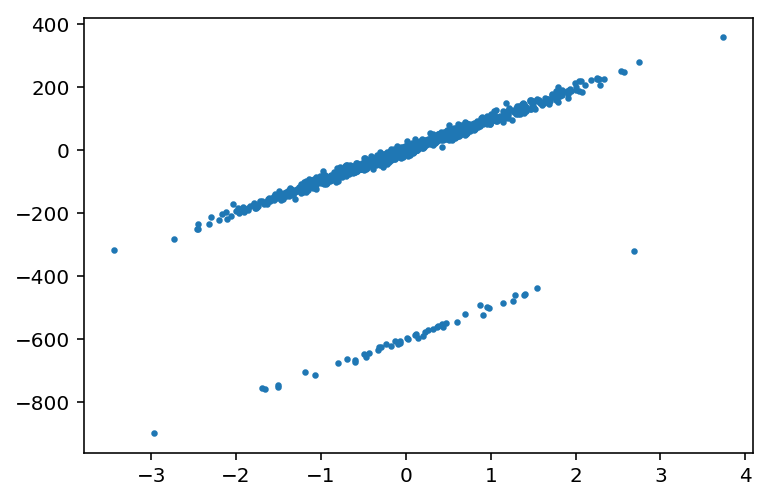

In [13]:
plt.scatter(X,Y_Out,s=5)

In [14]:
lr = LinearRegression()

lr.fit(X,Y_Out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
pred_Out = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

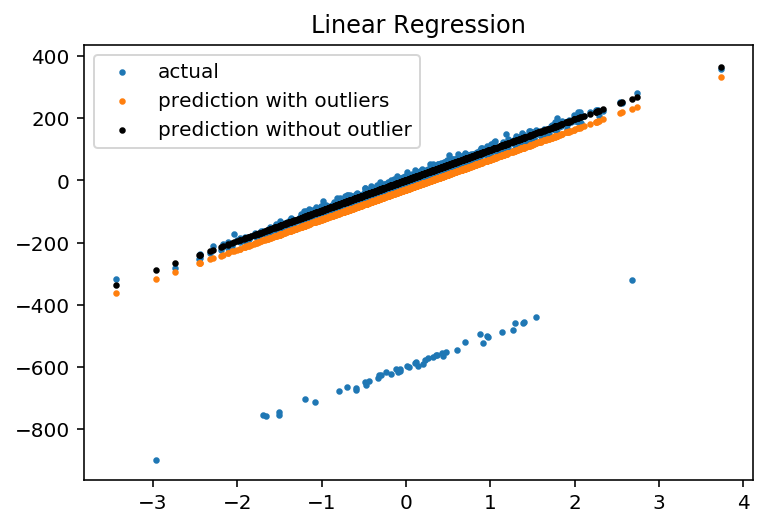

In [16]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

In [17]:
lr.coef_

array([96.51355355])

- alpha 값이 커질수록 규제 강해진다. 
    - w값이 더 작아진다.
    - error항의 영향이 줄어든다(즉, error는 더 커질 수 있다)

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1000)
ridge.fit(X,Y_Out)
pred_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

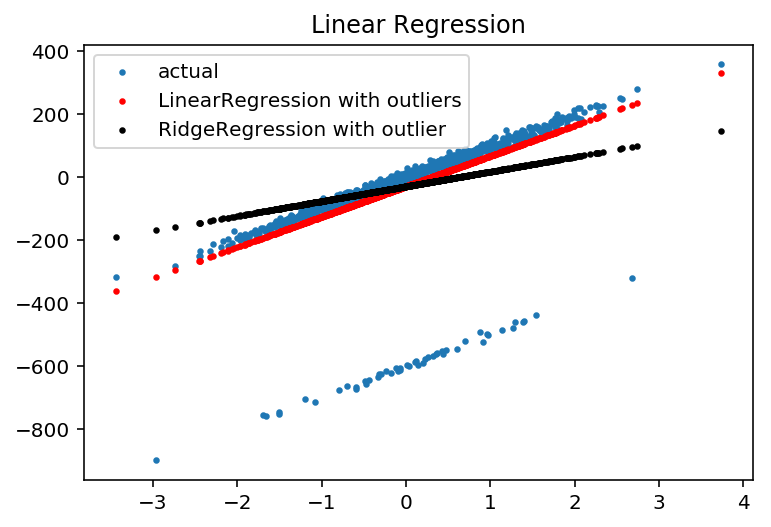

In [19]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [26]:
ridge.coef_

array([31.9257809])

## 교재 p.247 ---- 여기 까지

### Effects of alpha using Ridge on Coeficients 
* Data generation

In [20]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [21]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### Training Ridge for different values of alpha
* Coefs calculated are appended to a list
* Generate 20 alphas from 10^-6 to 10^6

In [22]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [23]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#### Plotting alphas & coefs
* Different colors represents different coefs

#### Conclusion
* As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
* For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

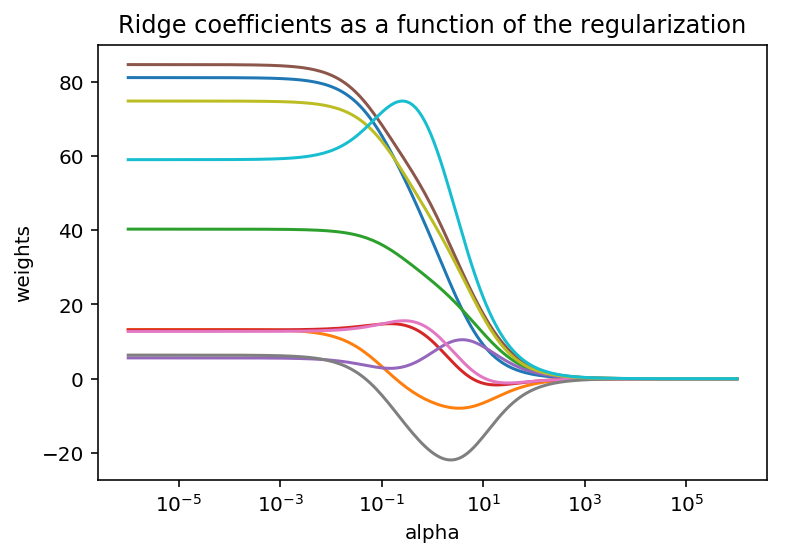

In [41]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()